#TELECOM CHURN PREDICTION MODEL USING ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Load dataset
df=pd.read_csv("/content/drive/MyDrive/ML project /telecom_churn.csv")

In [3]:
#check first 5 records
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Check number of rows and columns
df.shape

(7043, 21)

In [5]:
#Check column name present in data set
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
#check number of duplicate values
df.duplicated().sum()

0

In [7]:
#Chexk null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

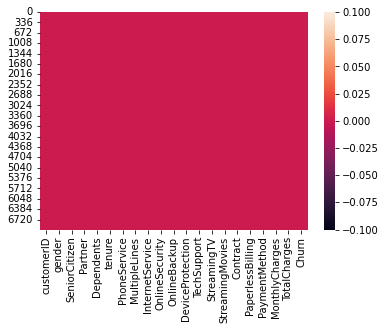

In [8]:
#visualize null values
sns.heatmap(df.isnull())


In [9]:
#check data types of column
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
933,4750-ZRXIU,Female,1,No,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,84.60,360.1,Yes
3847,8439-LTUGF,Male,0,No,No,10,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Credit card (automatic),20.00,198.6,No
1280,2388-LAESQ,Female,1,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),114.85,8317.95,No
6784,9546-KDTRB,Female,0,No,No,19,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.70,465.85,No
6632,9259-PACGQ,Female,0,Yes,No,34,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Month-to-month,No,Electronic check,62.65,2274.9,Yes


In [11]:
#check unvanted value in Totalcharges column
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
#change the unvanted value in null values
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"].astype(str),errors="coerce")

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
#find the mean of totalcharges column
m=df["TotalCharges"].mean()
m

2283.3004408418656

In [16]:
#check null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
#fill null value with mean of the column
df['TotalCharges'].fillna(m,inplace=True)

In [18]:
#check null value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

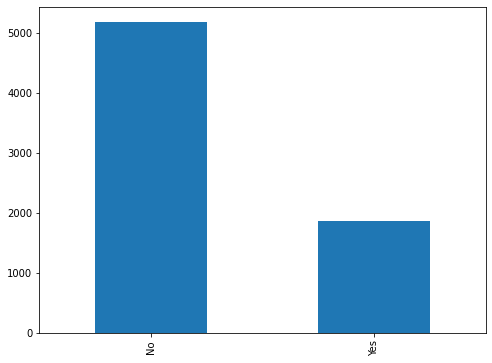

In [19]:
df['Churn'].value_counts().plot(kind='bar', figsize=(8, 6))


In [20]:
#how many percantage 1 and 0
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [21]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
#REMOVE CUSTOMERID COLUMN PERMANENT
df.drop('customerID',axis=1,inplace=True)


In [24]:
#SEPRATE ALL NUM TYPE DATA HOLD IN DF_NUM
df_num=df.select_dtypes(['int64','float64'])
#SEPRATE ALL OBJECT TYPE DATA HOLD IN DF_CAT
df_cat=df.select_dtypes(object)

In [25]:
#TO CONVERT OBJECT TYPE DATA IN NUMBER USING LABELENCODER
from sklearn.preprocessing import LabelEncoder
for col in df_cat:
  le=LabelEncoder()
  df_cat[col]=le.fit_transform(df_cat[col])

In [26]:
#CONCATENATE BOTH DATAFRAME 
df_new=pd.concat([df_num,df_cat],axis=1)

In [27]:
df_new.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [28]:
df_new["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

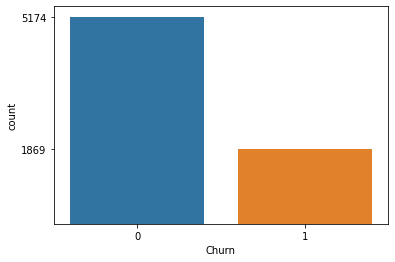

In [29]:
#VISUALIZS
sns.countplot(data=df_new,x='Churn')
f=df_new['Churn'].value_counts()
plt.yticks(f)
plt.show()


In [30]:
#HERE IS CLEAR UNDARSTAND DATA IS IMBALANCE
#WE HAVE TO BALANCE DATASET

In [31]:
#DIVIDE DATA INTO 70% AND 30% FOR TRAIN AND TEST

In [32]:
#SELECT INPUT AND OUTPUT FROM DATASET
x=df_new.drop('Churn',axis=1) #INPUT VARIABLE
y=df_new['Churn'] #OUTPUT TARGET

In [33]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)


#APPLY SCALING

In [35]:
#WORK ON STANDARDSCALER
from sklearn.preprocessing import StandardScaler
#FIT_TRANSFORM TRAING DATA X_TRAIN
#TRANSFORM USE ONLY TESTING DATA MEANS X_TEST
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.transform(x_test)

In [36]:
#APPLY RANDOMEOVERSAMPLER
#FIRST CREATE THE OBJECT OF CLASS RANDOMOVERSAMPLER
from imblearn.over_sampling import RandomOverSampler

In [37]:
#CREATE OBJECT OF RANDOMOVERSAMPLER CLASS
ros=RandomOverSampler(random_state=1)


In [38]:
#APPLY OVERSAMPLER TRAINING DATA(70%)
x_train1,y_train1=ros.fit_resample(x_train,y_train)


In [39]:
#CHECK AFTER APPLY RANDOMOVERSAMPLER
y_train1.value_counts()

0    3589
1    3589
Name: Churn, dtype: int64

In [40]:
#BEFORE APPLY RANDOMOVERSAPMLER TESTING DATA
y_test.value_counts()

0    1585
1     528
Name: Churn, dtype: int64

In [41]:
#ALSO APPLY RANDOMOVERSAMPLER TESTING DATA(30%)
x_test1,y_test1=ros.fit_resample(x_test,y_test)


In [42]:
#CHECK AFTER APLLY RANDOMOVERSAMPLER
y_test1.value_counts()

0    1585
1    1585
Name: Churn, dtype: int64

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [44]:
#CREATE A FUNCTION
def create_model(model):
 model.fit(x_train1,y_train1) #TRAIN THE MODAL
 y_pred=model.predict(x_test1) #TEST MODEL
 print(classification_report(y_test1,y_pred))
 print('confusion matrix :' )
 #CONFUSTION MATRIX
 print(confusion_matrix(y_test1,y_pred))
 return model,y_pred

In [45]:
#BASE LINE MODEL MENS LOGISTICREGRESSION (WE PREDICT YES OR NO VALUE THEN USE CLA
from sklearn.linear_model import LogisticRegression

In [46]:
#GIVEN TRANING DATA LOGISTICREGRESSION ALGORITHEM
#CREATE LOGISTIC CLASS
lr=LogisticRegression()


In [47]:
#CALL FUNCTION TRAIN AND TEST THE MODEL
lr,y_pred=create_model(lr)

              precision    recall  f1-score   support

           0       0.80      0.73      0.77      1585
           1       0.75      0.82      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

confusion matrix :
[[1162  423]
 [ 284 1301]]


In [48]:
#Note:- Here logisticregression we have to focus recall score here recall score for class
 # 0 is 73 and reacll score class 1 is 82
#Let's test the data with other model(algorithem)

#DecisionTreeClassifier

In [49]:
#now perfome data set with the help of decisiontreeclassifier
from sklearn.tree import DecisionTreeClassifier


In [50]:
#create object of decisiontreeclassifier
dt=DecisionTreeClassifier()

In [51]:
#call function train and test the model
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.64      0.81      0.71      1585
           1       0.74      0.54      0.62      1585

    accuracy                           0.67      3170
   macro avg       0.69      0.67      0.67      3170
weighted avg       0.69      0.67      0.67      3170

confusion matrix :
[[1285  300]
 [ 731  854]]


In [52]:
#here is clearly undrstand that the model is over fit, so reduced the overfitting
#over fiting situation by using the pruning technique
#1:-max_depth
#2:-min_samples_leaf

In [53]:
#1:- max_depth
dt1=DecisionTreeClassifier(max_depth=3,random_state=1)

In [54]:
#call function train and test the model
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1585
           1       0.73      0.83      0.78      1585

    accuracy                           0.76      3170
   macro avg       0.77      0.76      0.76      3170
weighted avg       0.77      0.76      0.76      3170

confusion matrix :
[[1099  486]
 [ 272 1313]]


In [55]:
#2:-min_samples_leaf
dt2=DecisionTreeClassifier(min_samples_leaf=70,random_state=1)


In [56]:
#call function train and test the model
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.77      0.74      0.75      1585
           1       0.75      0.78      0.76      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170

confusion matrix :
[[1168  417]
 [ 347 1238]]


In [57]:
#here decision tree classifier with use pruning technique max_depth give about ac
#we have focur recall score of class 0 is 69 and 1 is 83
#here decision tree classifier with use pruning technique min_depth give about ac
#we have focuse on recall score of class 0 is 0.74 and 1 is 0.78
#test data with other model

#Random Forest Classifier

In [58]:
#call random forest tree
from sklearn.ensemble import RandomForestClassifier


In [59]:
#create the object on randomforestclassifer class
rfc=RandomForestClassifier(n_estimators=15,max_features=12,random_state=1)

In [60]:
#call function train and test the model
rfc=create_model(rfc)


              precision    recall  f1-score   support

           0       0.69      0.82      0.75      1585
           1       0.78      0.64      0.70      1585

    accuracy                           0.73      3170
   macro avg       0.74      0.73      0.73      3170
weighted avg       0.74      0.73      0.73      3170

confusion matrix :
[[1301  284]
 [ 572 1013]]


In [61]:
#here random forestreeclassifier class recall o is 0.82 and 1 is 0.64
#test data with other model

#Boosting Technique
ensembling technique




In [62]:
#1. ADA boost
from sklearn.ensemble import AdaBoostClassifier
#create the object ADAboost
ada=AdaBoostClassifier(n_estimators=6,random_state=1)

In [63]:
#call function train and test the model
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.84      0.66      0.74      1585
           1       0.72      0.87      0.79      1585

    accuracy                           0.77      3170
   macro avg       0.78      0.77      0.76      3170
weighted avg       0.78      0.77      0.76      3170

confusion matrix :
[[1043  542]
 [ 199 1386]]


In [64]:
#2. gradientboostingclassifer
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
#create the object gradientboosting
gbc=GradientBoostingClassifier(n_estimators=50,random_state=1)

In [66]:
#call function train and test the model
gbc=create_model(gbc)


              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1585
           1       0.75      0.82      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.78      0.77      0.77      3170
weighted avg       0.78      0.77      0.77      3170

confusion matrix :
[[1154  431]
 [ 287 1298]]


In [67]:
#3. XGB classifier
from xgboost import XGBClassifier

In [68]:
#create the object xgradient
xgb=XGBClassifier(n_estimators=8,reg_alpha=1,random_state=1)

In [69]:
#call function train and test the model
xgb=create_model(xgb)

              precision    recall  f1-score   support

           0       0.82      0.68      0.75      1585
           1       0.73      0.85      0.79      1585

    accuracy                           0.77      3170
   macro avg       0.78      0.77      0.77      3170
weighted avg       0.78      0.77      0.77      3170

confusion matrix :
[[1083  502]
 [ 230 1355]]


In [70]:
#here ADA boost give about accuracy 0.77 score but here
#we have focur recall score of class 0 is 66 and 1 is 87
#here gradient boost give about accuracy 0.77 score but here
#we have focur recall score of class 0 is 73 and 1 is 82
#here XGBgradient boost give about accuracy 0.78 score but here
#we have focur recall score of class 0 is 68 and 1 is 85
#Let's test data with other model


#K-NN(KNeighborsClassifier):

In [71]:
from sklearn.neighbors import KNeighborsClassifier
#create the object k-nn
knc=KNeighborsClassifier(n_neighbors=15, metric='minkowski',p=2)


In [72]:
#call function train and test the model
knc=create_model(knc)

              precision    recall  f1-score   support

           0       0.81      0.67      0.73      1585
           1       0.72      0.84      0.77      1585

    accuracy                           0.75      3170
   macro avg       0.76      0.75      0.75      3170
weighted avg       0.76      0.75      0.75      3170

confusion matrix :
[[1058  527]
 [ 252 1333]]


In [73]:
#here k-nn give about accuracy 0.75 score but here
#we have focur recall score of class 0 is 67 and 1 is 84
#Let's test data with other model

#Suport Vector Machine

In [74]:
from sklearn.svm import LinearSVC
#create the object svm
svc=LinearSVC(random_state=1)
#call function train and test the model
svc=create_model(svc)

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1585
           1       0.75      0.84      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

confusion matrix :
[[1143  442]
 [ 259 1326]]


In [75]:
#here accuracy is 0.78 which is good but we can more better
#add some external error on trainig time object od LinerSVS

In [76]:
#create the object svm1
svc1=LinearSVC(random_state=1,C=0.7)

In [77]:
#call function train test the model
svc1=create_model(svc1)


              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1585
           1       0.75      0.84      0.79      1585

    accuracy                           0.78      3170
   macro avg       0.78      0.78      0.78      3170
weighted avg       0.78      0.78      0.78      3170

confusion matrix :
[[1143  442]
 [ 259 1326]]


In [78]:
#here data is non-linear changing the value 'c' above acuracy not change
#adding external error traning time but any no changes on score
#mens data is linear if any changes then data is non-linear

In [79]:
#work on non-linear dataset
from sklearn.svm import SVC
#create the object poly
svc2=SVC(random_state=1,kernel='poly')

In [80]:
#call function train and test the model
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1585
           1       0.75      0.79      0.77      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

confusion matrix :
[[1173  412]
 [ 331 1254]]


In [81]:
#work on radial basis
svc3=SVC(random_state=1,kernel='rbf')

In [82]:
#call function train and test the model
svc3=create_model(svc3)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      1585
           1       0.76      0.78      0.77      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

confusion matrix :
[[1197  388]
 [ 345 1240]]


In [83]:
#here poly give about accuracy 0.77 score but here
#we have focur recall score of class 0 is 0.74 and 1 is 0.79
#Let's test data with other model
#here radiel give about accuracy 0.77 score but here
#we have focur recall score of class 0 is 0.76 and 1 is 0.78
#Let's test data with other model


#Naive Bayes Classifier

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
#create object navie bayes classifier
gnb=GaussianNB()
#call function train and test the model
gnb=create_model(gnb)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1585
           1       0.75      0.83      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.78      0.77      0.77      3170
weighted avg       0.78      0.77      0.77      3170

confusion matrix :
[[1140  445]
 [ 277 1308]]


In [86]:
#here naive bayes give about accuracy 0.77 score but here
#we have focur recall score of class 0 is 0.72 and 1 is 0.83
#Let's test data with other model

#CONCLUSION
here we will recommend 
Suport Vector Machine algorithem for the give data for telecom_churn,
here accuracy is 0.78 which is good better,we have focur recall score of class 0 is 0.72 and 1 is 0.84